In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
from keras.models import load_model


In [ ]:
model = InceptionV3(weights='imagenet')

model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalizati

In [ ]:
drive.mount('/content/drive')
model_path = '/content/drive/MyDrive/Master IA^3/TFM/Sistema de detección prematura de cáncer de tórax/Model/model_InceptionNet.h5'
model1 = load_model(model_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
ruta_imagen = '/content/drive/MyDrive/Master IA^3/TFM/Sistema de detección prematura de cáncer de tórax/APP/Imagenes/Fotos299/1.png'

imagen = cv2.imread(ruta_imagen)

if imagen is None:
    print("Error: No se pudo cargar la imagen.")
else:
    print("La imagen se ha cargado correctamente.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
La imagen se ha cargado correctamente.


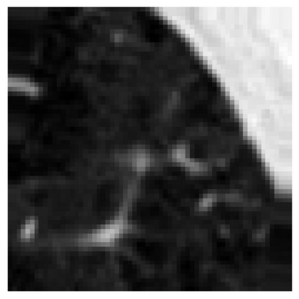

In [ ]:
ORIGINAL = '/content/drive/MyDrive/Master IA^3/TFM/Sistema de detección prematura de cáncer de tórax/APP/Imagenes/Fotos299/1.png'

DIM = 299

img = image.load_img(ORIGINAL, target_size=(DIM, DIM))

cv2_imshow(cv2.imread(ORIGINAL))

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print(decode_predictions(preds))

1/1 [==============================] - 2s 2s/step
[[('n01930112', 'nematode', 0.54769206), ('n03929660', 'pick', 0.05619789), ('n01873310', 'platypus', 0.016159313), ('n04311004', 'steel_arch_bridge', 0.012458739), ('n01990800', 'isopod', 0.008778886)]]


In [ ]:
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer('conv2d_93')
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

In [ ]:

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((8, 8))


In [ ]:
img = cv2.imread(ORIGINAL)

In [ ]:
INTENSITY = 0.5

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

img = heatmap * INTENSITY + img

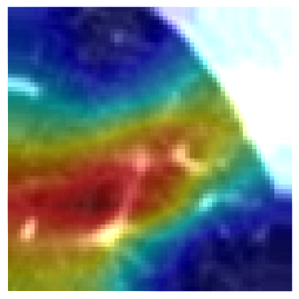

In [ ]:
cv2_imshow(img)